In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
from doepy import build

In [3]:
## if no doepy 
# !pip install doepy 

  Using cached pyDOE-0.3.8.zip (22 kB)
  Created wheel for diversipy: filename=diversipy-0.8-py3-none-any.whl size=27531 sha256=8bd7709a5498bef9b78501cdcf64a4d3f79a3d951dee1b8a7acdf1fe954366c5
  Stored in directory: c:\users\petbr908\appdata\local\pip\cache\wheels\e1\67\c9\25d8982144e3cbc41f7af8dd429f7204570ed7eee561bfe79c
  Created wheel for pyDOE: filename=pyDOE-0.3.8-py3-none-any.whl size=18184 sha256=777323ff616636c8fa5ec83bd425c75f90063f56d027f63c367f0f175b729ded
  Stored in directory: c:\users\petbr908\appdata\local\pip\cache\wheels\3c\ca\0d\63b767ad585fbcb3ea222541572dcb78859d0383510672b105
Successfully built diversipy pyDOE
Note: you may need to restart the kernel to use updated packages.


# Introduction
In this example we will use python to create a factorial design and of a tre-factor expeeriment with four repetitions. The data can be found the provided Excel sheet. 



first, let's create a full factoral design using pyDOE 


In [17]:
reps = 4  #  number of repetitions
samples=pd.DataFrame({})
for i in range(0,reps):  
    sample=build.full_fact(
    {'Nozzle Diameter':[0.2, 1],    
    'Orientation':[0, 90],
    'Infill':[5,100]}
    )
    samples=samples.append(sample)
    
samples 

,Nozzle Diameter,Orientation,Infill
0,0.2,0.0,5.0
1,1.0,0.0,5.0
2,0.2,90.0,5.0
3,1.0,90.0,5.0
4,0.2,0.0,100.0
5,1.0,0.0,100.0
6,0.2,90.0,100.0
7,1.0,90.0,100.0
0,0.2,0.0,5.0
1,1.0,0.0,5.0


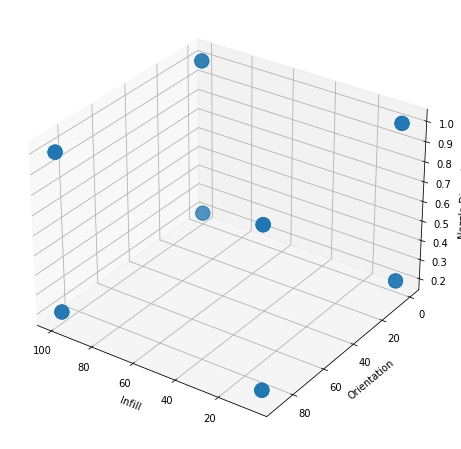

In [15]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(samples.Infill,
           samples.Orientation,
           samples['Nozzle Diameter'],
           s=200)
ax.set_xlabel('Infill')
ax.set_ylabel('Orientation')
ax.set_zlabel('Nozzle Diameter');
ax.view_init(30, 125)
plt.show()

In [20]:
outcome=[8,26.2,14.8,44,16.6,28.2,14.8,42.2,9.2,33.6,15.2,44,12.4,24.4,15,43.2,14.2,40,16,45,12.8,24.4,14.6,41.8,10.6,28.8,15.2,43.8,14,23.2,20.8,41
]

samples['outcome']=outcome
samples

,Nozzle Diameter,Orientation,Infill,outcome
0,0.2,0.0,5.0,8.0
1,1.0,0.0,5.0,26.2
2,0.2,90.0,5.0,14.8
3,1.0,90.0,5.0,44.0
4,0.2,0.0,100.0,16.6
5,1.0,0.0,100.0,28.2
6,0.2,90.0,100.0,14.8
7,1.0,90.0,100.0,42.2
0,0.2,0.0,5.0,9.2
1,1.0,0.0,5.0,33.6


Next step is to generate a model

In [ ]:
def Pair_effect(data=samples, par='A', effect='B')